# Linear and Logistic Regression
- **100 points**

### Instructions
- you cannot use any other library.Write the code from scratch.
- You're free to add any number of methods within each class.
- You may also add any number of additional code blocks that you deem necessary.
- link for the datasets - https://drive.google.com/drive/folders/1MXmIChMxodGbEpowyVJBFLdvaDpj23gd?usp=sharing


## Question 1 (50 points)

## Linear Regression

In this section, we'll implement a linear regression model that can learn to predict a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

In [57]:
# Importing Libraries
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data Preparation.
To keep things simple, first we'll use a toy dataset to test our implementation. This dataset contains the heights and weights of a few individuals. Our goal is to predict the weight of an individual given their height using a linear regression model.

In [58]:
df = pd.read_csv('heights.csv')

In [59]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


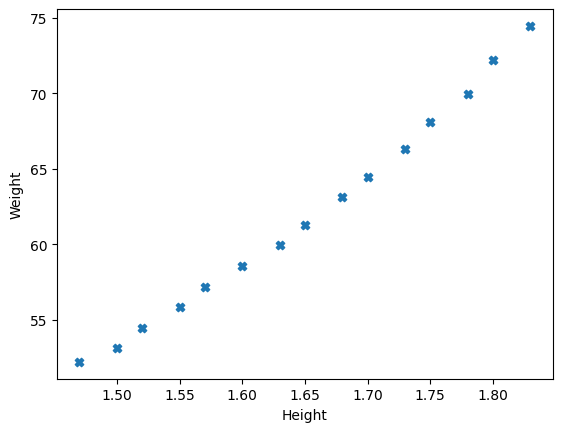

In [60]:
plt.scatter(df['Height'], df['Weight'], marker='X')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

Looking at the distribution of the data, it seems like `Weight` and `Height` have a linear relationship. Hence, a linear regression model should be able to capture this relationship.  

Let's us convert the dataframe `df` to a Numpy array so that it is easier to perform operations on it.

In [61]:
X_train = np.array(df['Height'])
y_train = np.array(df['Weight'])
X_train = np.expand_dims(X_train, -1)

### (30 points) Implement the ` LinearRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [62]:
class LinearRegression:
    def __init__(self, lr=0.001, epochs=30):
        """
        Fits a linear regression model on a given dataset.

        Args:
            lr: learning rate
            epochs: number of iterations over the dataset
        """
        self.lr = lr
        self.epochs = epochs
        ######################
        #   YOUR CODE HERE   #
        ######################
        # You may add additional fields


    def train(self, X, y):
        """
        Initialize weights. Iterate through the dataset and update weights once every epoch.

        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        self.m, self.n = X.shape

        self.W = np.zeros(self.n)            # initializing weights and biases with zero.
        self.b = 0
        self.X = X
        self.y = y

        for i in range(self.epochs):
            self.update_weights(X, y)
            
        return self



    def update_weights(self, X, y):
        """
        Helper function to calculate the gradients and update weights using batch gradient descent.

        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        y_pred = self.predict(X)
        
        dW = - ( 2 * np.dot( X.T, (y - y_pred ) )) / self.m 
       
        db = - (2 * np.sum( y - y_pred ) )/ self.m 

        
        self.W = self.W - self.lr * dW 
      
        self.b = self.b - self.lr * db 
          
        return self



    def predict(self, X):
        """
        Predict values using the weights.

        Args:
            X: features

        Returns:
            The predicted value.
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        return np.dot(X, self.W) + self.b



### Build the model and train on the dataset.

In [63]:
model = LinearRegression(0.01, 100000)
model.train(X_train, y_train)

### (5 points) Implement the evaluation metric `mean squared error`.
We use the [mean squared error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error) as the metric to evaluate our model.

In [64]:
def mean_squared_error(y_pred, y_actual):
    """
    Calculates the mean squared error between two vectors.

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The mean squared error.
    """
    ######################
    #   YOUR CODE HERE   #
    ######################
    
    return np.mean((y_actual-y_pred)**2)



### Make predictions using the model and evaluate it.

In [65]:
y_pred = model.predict(X_train)
print("Train MSE: {:.4f}".format(mean_squared_error(y_pred, y_train)))

Train MSE: 0.4994


### Plot the predicted and the actual values.

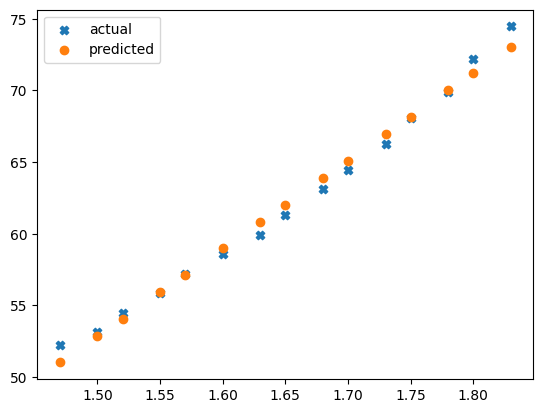

In [66]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='X', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.legend()
plt.show()

In [67]:
# Source - https://www.geeksforgeeks.org/linear-regression-implementation-from-scratch-using-python/

### Multiple linear regression for sales prediction

Next we use our linear regression model to learn the relationship between sales and advertising budget for a product. The `advertise.csv` dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio, and newspaper. The sales are in thousands of units and the budget is in thousands of dollars.  

We will train a linear regression model to predict the sales of the product given the TV, radio, and newspaper ad budgets.

In [68]:
df = pd.read_csv('advertise.csv')

In [69]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [70]:
X = np.array(df[['TV', 'Radio', 'Newspaper']])
y = np.array(df['Sales'])

### (5 points) Normalize the features in your dataset.

Gradient descent-based models can be sensitive to different scales of the features/independent variables. Hence, it is important to normalize them. You may use the functions, `dataset_minmax`, `normalize_dataset`, and `unnormalize_dataset`, provided in the code block below to perform [min-max normalization](https://en.wikipedia.org/wiki/Feature_scaling) on the features.

In [71]:
def dataset_minmax(dataset):
    """
    Finds the min and max values for each column.
    """
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

def normalize_dataset(dataset, minmax):
    """
    Rescales dataset columns to the range 0-1.
    """
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
    return dataset

def unnormalize_dataset(dataset, minmax):
    """
    Rescales dataset columns to their original values.
    """
    for row in dataset:
        for i in range(len(row)):
            row[i] = minmax[i][0] + (minmax[i][1] - minmax[i][0]) * row[i]
    return dataset

In [72]:
######################
#   YOUR CODE HERE   #
######################       
minmax = dataset_minmax(X)  
X = normalize_dataset(X, minmax)  # normalizing X.
# print(X)  

### Split the data into train and test set.

In [73]:
def split_indices(n, test_frac, seed):
    """
    Provides indices for creating training and test set.
    """
    # Determine the size of the test set
    n_test = int(test_frac * n)
    np.random.seed(seed)
    # Create random permutation between 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_test indices for test set
    return idxs[n_test:], idxs[:n_test]

In [74]:
test_frac = 0.2 ## Set the fraction for the test set
rand_seed = 42 ## Set the random seed

train_indices, test_indices = split_indices(df.shape[0], test_frac, rand_seed)
print("#samples in training set: {}".format(len(train_indices)))
print("#samples in test set: {}".format(len(test_indices)))

#samples in training set: 160
#samples in test set: 40


In [75]:
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

### Build the model and train on the dataset.

In [76]:
model = LinearRegression(0.01, 100000)
model.train(X_train, y_train)

### (10 points) Evaluation on training and test set.
If you have implemented `LinearRegression` correctly, the **test MSE** should be < 3.

In [77]:
print("Training MSE: {:.4f}".format(mean_squared_error(model.predict(X_train), y_train)))
print("Test MSE: {:.4f}".format(mean_squared_error(model.predict(X_test), y_test)))

Training MSE: 2.6761
Test MSE: 2.9078


# Using Closed Form Solution(75)


* For both the above 2 models you need to try out the closed form solutions
* The more efforts you put in, the more marks you get.
* It is open ended

In [78]:
###########################
### Write your code here###
###########################

# For dataset 1 :

def closed_form(X, y):
    X_b = np.concatenate([np.ones((len(X), 1)), X], axis=1)   # adds a bias column initialized as 1 to the left of X.
    X_transpose = X_b.T
    W = np.linalg.inv(X_transpose.dot(X_b)).dot(X_transpose).dot(y)  
    
    return W


In [79]:
df = pd.read_csv('heights.csv')

In [80]:
X_train = np.array(df['Height'])
y_train = np.array(df['Weight'])
X_train = np.expand_dims(X_train, -1)

In [81]:
z = closed_form(X_train, y_train)

b = z[0]
W = z[1:]

In [82]:
y_pred =  np.dot(X_train, W) + b
print("Train MSE: {:.4f}".format(mean_squared_error(y_pred, y_train)))

Train MSE: 0.4994


In [83]:
# For dataset 2 : 

df = pd.read_csv('advertise.csv')

In [84]:
X = np.array(df[['TV', 'Radio', 'Newspaper']])
y = np.array(df['Sales'])

In [85]:
minmax = dataset_minmax(X)  
X = normalize_dataset(X, minmax) 

In [86]:
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

In [87]:
z_train = closed_form(X_train, y_train)        # first bias term, rest weights.
b_train = z_train[0]
W_train = z_train[1:]

z_test = closed_form(X_test, y_test)
b_test = z_test[0]
W_test = z_test[1:]

In [88]:
y_train_pred = np.dot(X_train, W_train) + b_train
y_test_pred = np.dot(X_test, W_test) + b_test

In [89]:
print("Training MSE: {:.4f}".format(mean_squared_error(y_train_pred, y_train)))
print("Test MSE: {:.4f}".format(mean_squared_error(y_test_pred, y_test)))

Training MSE: 2.6761
Test MSE: 2.5547


In [90]:
# Source - https://www.datacamp.com/tutorial/tutorial-normal-equation-for-linear-regression

## Question 2 (50 points)

## Logistic Regression

In this section, we'll implement a logistic regression model that can learn to predict the class/label of a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

### Data Preparation
Once again, to keep things simple, first we'll use the heights and weights dataset to test our implementation. Let's divide the weights into 2 categories: 0 if the weight is < 60 and 1 otherwise. Our goal is to predict the weight category of an individual given their height using a logistic regression model.

In [91]:
df = pd.read_csv('heights.csv')
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [92]:
X_train = np.array(df['Height'])
y_train = np.array((df['Weight'] >= 60).astype('float'))
X_train = np.expand_dims(X_train, -1)

### (30 points) Implement the ` LogisticRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [93]:
class LogisticRegression:
    def __init__(self, lr=0.001, epochs=30):
        """
        Fits a logistic regression model on a given dataset.

        Args:
            lr: learning rate
            epochs: number of iterations over the dataset
        """
        self.lr = lr
        self.epochs = epochs
        ######################
        #   YOUR CODE HERE   #
        ######################
        # You may add additional fields

    def sigmoid(self, X):
        return 1.0/(1.0+np.exp(-X))
    
    def binary_cross_entropy(self, y_true, y_pred):
        y1 = y_true * np.log(y_pred)
        y2 = (1-y_true) * np.log(1 - y_pred)
        return -np.mean(y1 + y2)

    # Function for model training
    def train(self, X, y):
        """
        Initialize weights. Iterate through the dataset and update weights once every epoch.

        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        self.m, self.n = X.shape

        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.y = y

        for i in range(self.epochs):
            self.update_weights(X, y)
            
        return self

        



    def update_weights(self, X, y):
        """
        Helper function to calculate the gradients and update weights in gradient descent.

        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        y_pred = self.predict(X)

        dW = - ( 2 * np.dot( X.T, (y - y_pred ) )) / self.m 
       
        db = - (2 * np.sum( y - y_pred ) )/ self.m 

        self.W = self.W - self.lr * dW 
      
        self.b = self.b - self.lr * db 
          
        return self


    def predict(self, X):
        """
        Predict probabilities using the weights.

        Args:
            X: features

        Returns:
            The predicted probability.
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        z = np.dot(X, self.W)+self.b
        return self.sigmoid(z)



### Build the model and train on the dataset.

In [94]:
model = LogisticRegression(0.1, 100000)
model.train(X_train, y_train)

### (5 points) Implement the evaluation metric `accuracy`.
We use the [accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy) as the metric to evaluate our model.

In [95]:
def accuracy(y_pred, y_actual):
    """
    Calculates the accuracy of the predictions (binary values).

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The accuracy.
    """
    ######################
    #   YOUR CODE HERE   #
    ######################
    total = len(y_actual)

    count = 0
    for i in range(len(y_actual)):
        if (y_pred[i]==y_actual[i]):
            count += 1

    return count/total

### Make predictions using the model and evaluate it.

In [96]:
y_pred_probs = model.predict(X_train)
y_pred = (y_pred_probs >= 0.5).astype('float')
print("Train Accuracy: {}".format(accuracy(y_pred, y_train)))

Train Accuracy: 1.0


In [97]:
print(y_pred)        # just checking if it is actually 100% accurate.
print(y_train)

[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]


### Plot the predicted and the actual values.

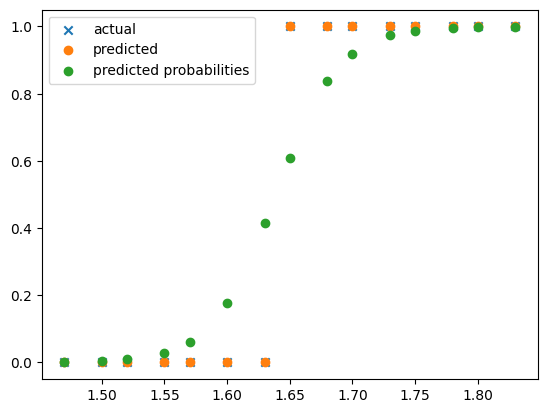

In [98]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='x', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.scatter(X_train, y_pred_probs, marker='o', label='predicted probabilities')
plt.legend()
plt.show()

# ** Use the Newton Raphson Method for the same** (75 marks)


In [99]:
#####################
#   YOUR CODE HERE   #
######################

In [100]:
def sigmoid(b, W, X):
    y = np.dot(X, W) + b
    epsilon = 1e-15                             # clipping because I was getting 0 inside log.
    clipped_y = np.clip(y, epsilon, 1-epsilon)
    return 1.0/(1.0+np.exp(-clipped_y))

def log_likelihood(b, W, x, y):
    sigmoid_prob = sigmoid(b, W, x)
    return np.sum(y*np.log(sigmoid_prob) + (1-y)*np.log(1- sigmoid_prob) )

def gradient(b, W, x, y):
    sigmoid_prob = sigmoid(b, W, x) 
    return np.array([[np.sum((y - sigmoid_prob)*x), np.sum(y - sigmoid_prob)]])


def hessian(b, W, x, y):
    sigmoid_prob = sigmoid(b, W, x)
    a11 = np.sum(sigmoid_prob * (1 - sigmoid_prob) * x * x)
    a12 = np.sum(sigmoid_prob * (1 - sigmoid_prob) * x * 1)
    a22 = np.sum(sigmoid_prob * (1 - sigmoid_prob) * 1 * 1)
    return np.array([[a11, a12],[a12, a22]])                     #a12==a21

def newtons_method(x, y):
    b = 0.0                       # initializing.
    W = 5.0
    cost_reduction = np.Infinity
    l = log_likelihood(b, W, x, y)

    delta = 0.0001
    max_iterations = 15
    
    i = 0

    while abs(cost_reduction) > delta and i < max_iterations:
        i +=1
        g = gradient(b, W, x, y)
        h = hessian(b, W,x, y) 
        h_inv = np.linalg.inv(h)

        update = np.dot(h_inv, g.T)
        update_b = update[0][0]
        update_W = update[1][0]

        b += update_b
        W += update_W

        l_new = log_likelihood(b, W, x, y)
        cost_reduction = l - l_new
        l = l_new

    return np.array([b, W])

In [101]:
# Source - https://github.com/shaily-stack/Newtons-Method-_Logistic/blob/master/Newton's%20method_Logistic%20Regression.ipynb

In [102]:
df = pd.read_csv('heights.csv')
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [103]:
X_train = np.array(df['Height'])
y_train = np.array(df['Weight'] >= 60).astype('float')
# X_train = X_train.reshape(-1, 1)
# y_train = y_train.reshape(-1, 1)

# print(X_train)
# print(y_train)

In [104]:
b, W = newtons_method(X_train, y_train)
print(b)
print(W)

35.54358809314038
-54.54294523039986


In [105]:
y_pred_probs = sigmoid(b, W, X_train)
y_pred = (y_pred_probs >=0.5).astype('float')
print("Train Accuracy: {}".format(accuracy(y_pred, y_train)))

Train Accuracy: 0.5333333333333333


In [106]:
print(y_pred)                   # getting all ones, surely something is wrong and I couldn't fix it.
print(y_train)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]


# K Means Clustering(100 marks)



In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the three Gaussians
mu1 = np.array([3, 3])
Sigma1 = np.array([[1, 0], [0, 2]])

mu2 = np.array([1, -3])
Sigma2 = np.array([[2, 0], [0, 1]])

mu3 = np.array([-10, 8])
Sigma3 = np.array([[2, 0], [0, 2]])



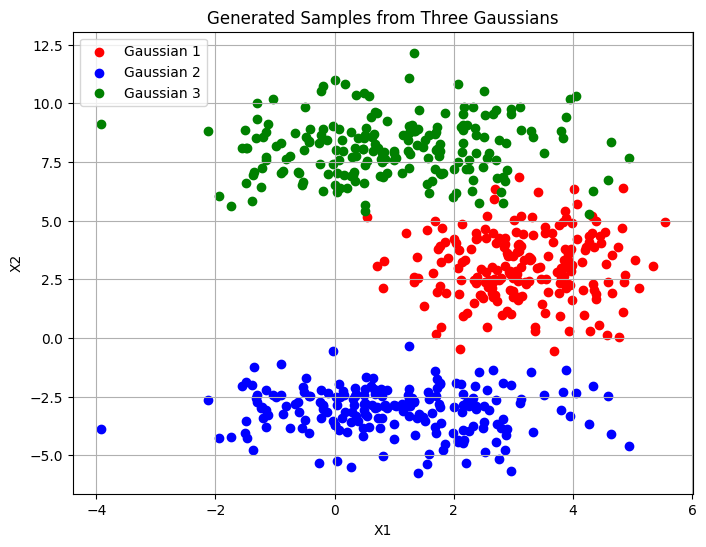

In [108]:
n_samples = 200
samples1 = np.random.multivariate_normal(mu1, Sigma1, n_samples)
samples2 = np.random.multivariate_normal(mu2, Sigma2, n_samples)
samples3 = np.random.multivariate_normal(mu3, Sigma3, n_samples)

# Plot the generated samples
plt.figure(figsize=(8, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], c='red', label='Gaussian 1')
plt.scatter(samples2[:, 0], samples2[:, 1], c='blue', label='Gaussian 2')
plt.scatter(samples2[:, 0], samples3[:, 1], c='green', label='Gaussian 3')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Generated Samples from Three Gaussians')
plt.legend()
plt.grid(True)
plt.show()

The above is the dataset generated from 3 gaussians, and a visualizations for the same, You need to assume that you have the data and then you use k means for the same your output should be similar to what is shown above

In [109]:
#####################
#   YOUR CODE HERE   #
######################
data = np.vstack((samples1, samples2, samples3))   # combining into single dataset.

In [110]:
class KMeans:
    def __init__(self, n_clusters, max_iters=200):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]      # X.shape[0] = 600
        #  i.e. choose centroids randomly from 0 to 599 of size n_clusters(3).
        
        for i in range(self.max_iters):
            labels = self.assign_labels(X)
            
            # Update centroids
            new_centroids = self.update_centroids(X, labels)
            
            if np.all(self.centroids == new_centroids):     #i.e. no more changes can be made.
                break
                
            self.centroids = new_centroids

    def assign_labels(self, X):
        # Compute distances from each data point to centroids
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        
        return np.argmin(distances, axis=1)        # index of the lowest distance.
    
    def update_centroids(self, X, labels):
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return new_centroids

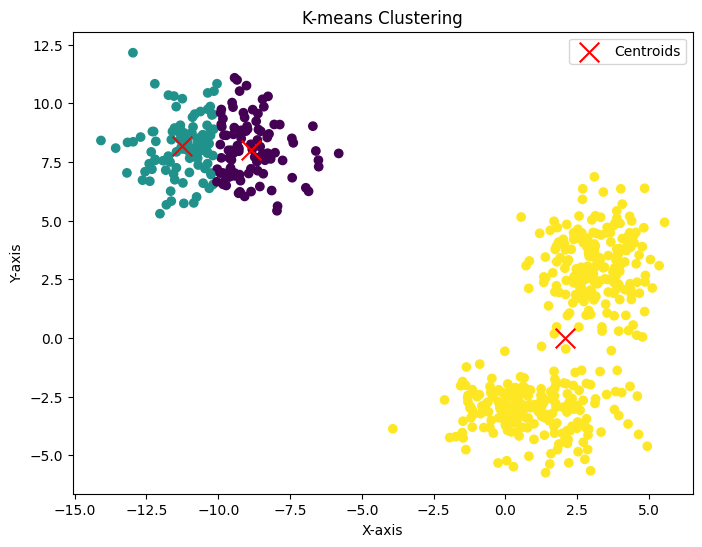

In [111]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
labels = kmeans.assign_labels(data)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

In [112]:
# Source - https://medium.com/@avijit.bhattacharjee1996/implementing-k-means-clustering-from-scratch-in-python-a277c23563ac